## Problem2

A National Zoopark in India is dealing with the problem of segregation of the animals based on the different attributes they have. Build a KNN model to automatically classify the animals. Explain any inferences you draw in the documentation.

In [81]:
import pandas as pd
import numpy as np

zoo = pd.read_csv("Zoo.csv")

In [82]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [83]:
zoo['type'].nunique()

7

We have 7 classifications of animals

In [84]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

there are 6 types of glass. Target variable has 6 classes

In [85]:
zoo.shape

(101, 18)

In [86]:
zoo['animal name'].nunique()

100

In [87]:
#get numeric features . We will join categorical column after one hot encoding.
zoo_features = zoo.iloc[:, 1:17]

In [88]:
zoo_features

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [89]:
# zoo['animal name'] we one hot encode to 99 columns
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing animal name column 
enc_df = pd.DataFrame(enc.fit_transform(zoo[['animal name']]).toarray())
# merge with main df bridge_df on key values
zoo_features = zoo_features.join(enc_df)
zoo_features


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,90,91,92,93,94,95,96,97,98,99
0,1,0,0,1,0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,1,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0,0,1,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,1,0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,1,0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
97,1,0,1,0,1,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
98,1,0,0,1,0,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,0,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [90]:
zoo_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Columns: 116 entries, hair to 99
dtypes: float64(100), int64(16)
memory usage: 91.7 KB


In [91]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [92]:
# Normalized data frame (considering the numerical part of data)
zoo_n = norm_func(zoo_features)
zoo_n.describe() 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,...,90,91,92,93,94,95,96,97,98,99
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,...,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901,0.009901
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,...,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504,0.099504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
X = np.array(zoo_n.iloc[:,:]) # Predictors 
Y = np.array(zoo['type']) # Target

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [95]:
pd.DataFrame(Y_train).value_counts()

1    31
2    16
4     9
7     9
6     7
3     4
5     4
dtype: int64

In [96]:
pd.DataFrame(Y_test).value_counts()

1    10
2     4
4     4
3     1
6     1
7     1
dtype: int64

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)

pred = knn.predict(X_test)
pred

array([1, 4, 4, 1, 1, 1, 1, 3, 1, 4, 1, 1, 2, 1, 2, 4, 3, 2, 6, 2, 1],
      dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score
# accuracy on training data 
pred_train = knn.predict(X_train)
accuracy_score(Y_train, pred_train)

0.975

In [99]:
# Evaluate the model
# accuracy on test data 
accuracy_score(Y_test, pred)

0.9523809523809523

In [100]:
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,31,0,0,0,0,0,0
2,0,16,0,0,0,0,0
3,0,1,3,0,0,0,0
4,0,0,0,9,0,0,0
5,0,0,1,0,3,0,0
6,0,0,0,0,0,7,0
7,0,0,0,0,0,0,9


In [101]:
pd.crosstab(Y_test, pred, rownames = ['Actual'], colnames= ['Predictions']) 

Predictions,1,2,3,4,6
Actual,,,,,
1,10,0,0,0,0
2,0,4,0,0,0
3,0,0,1,0,0
4,0,0,0,4,0
6,0,0,0,0,1
7,0,0,1,0,0


In [128]:
# creating empty list variable 
acc = []

In [129]:
# running KNN algorithm for 1 to 10 nearest neighbours(odd numbers) and 
# storing the accuracy values

for i in range(3,10,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    train_acc = np.mean(neigh.predict(X_train) == Y_train)
    test_acc = np.mean(neigh.predict(X_test) == Y_test)
    acc.append([i, train_acc, test_acc])

In [130]:
acc


[[3, 0.9625, 0.9047619047619048],
 [5, 0.975, 0.9523809523809523],
 [7, 0.9375, 0.9523809523809523],
 [9, 0.9375, 0.9047619047619048]]

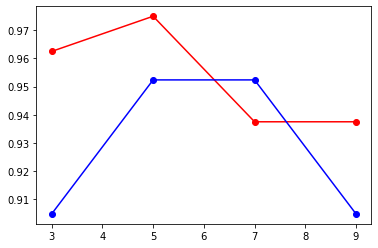

In [131]:
import matplotlib.pyplot as plt # library to do visualizations 

# train accuracy plot 
plt.plot(np.arange(3,10,2),[i[1] for i in acc],"ro-")

# test accuracy plot
plt.plot(np.arange(3,10,2),[i[2] for i in acc],"bo-")

From the above graph we choose k= 5,6

In [132]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
# accuracy on training data 
pred_train = knn.predict(X_train)
accuracy_score(Y_train, pred_train) ,accuracy_score(Y_test, pred)

(0.975, 0.9523809523809523)

In [133]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, Y_train)
# accuracy on training data 
pred_train = knn.predict(X_train)
accuracy_score(Y_train, pred_train) ,accuracy_score(Y_test, pred)

(0.95, 0.9523809523809523)

Based on the accuracy results we evaluate confusion matrix for k=2,3

In [134]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,31,0,0,0,0,0,0
2,0,16,0,0,0,0,0
3,0,1,2,1,0,0,0
4,0,0,0,9,0,0,0
5,0,0,0,0,4,0,0
6,0,0,0,0,0,7,0
7,0,0,0,0,0,2,7


In [135]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, Y_train)
pd.crosstab(Y_train, pred_train, rownames=['Actual'], colnames = ['Predictions']) 

Predictions,1,2,3,4,5,6,7
Actual,,,,,,,
1,31,0,0,0,0,0,0
2,0,16,0,0,0,0,0
3,0,1,2,1,0,0,0
4,0,0,0,9,0,0,0
5,0,0,0,0,4,0,0
6,0,0,0,0,0,7,0
7,0,0,0,0,0,2,7


both the above tables are the same. so we choose k=5 as its computationally inexpensive.